Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes. Notes and tips:
    1. Given that the data have already been collected, note that this is technically a "post-hoc" power analysis and is for demonstration purposes only. Normally these analyses must be done before collecting data.
    2. Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session.
    3. Thus, to obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.
    4. Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.
    5. To compute power, you can use TTestIndPower in Python, or sampsizepwr in Matlab


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, spearmanr, norm
import statsmodels.stats.power as smp

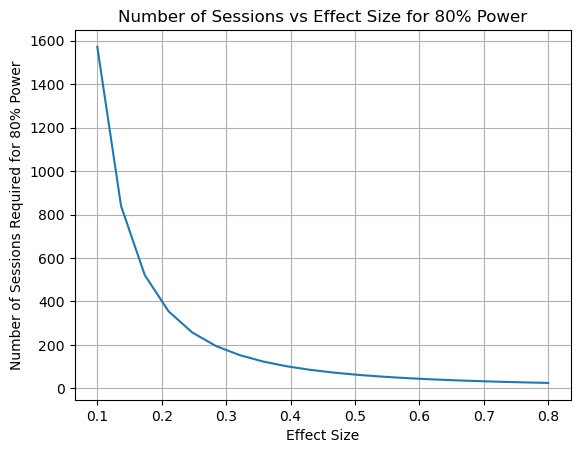

In [3]:
#Begin by simulating the data. Here we are defining a function.
def simulate_data(n_sessions, mean_lc, std_pupil):
    lc_activity = poisson.rvs(mean_lc, size = n_sessions)   #Poisson-distributed LC spiking data
    pupil_diameter = norm.rvs(size = n_sessions, loc = 0, scale = std_pupil)    #Gaussian-distributed pupil data - loc = mean and scale is STD
    return lc_activity, pupil_diameter

#Compute the Spearman correlation for multiple simulations. Here we are defining a function.
def compute_correlations(n_sessions, n_simulations, mean_lc = 5, std_pupil = 1):
    correlations = []
    for _ in range(n_simulations):
        lc_activity, pupil_diameter = simulate_data(n_sessions, mean_lc, std_pupil)
        corr, _ = spearmanr(lc_activity, pupil_diameter)    #The function sparmanr() calculates the Spearman rank-order correlation coefficient between the spike rates and pupil diameters for each experiment. Since the function returns two values (corr coefficient and p-value) and we only want to store the first value, we ignore the second by putting _.
        correlations.append(correlations)
    return correlations

#Perform post-hoc power analysis.
def power_analysis(effect_sizes, alpha=0.05, power_target=0.8):
    power_analysis_tool = smp.TTestIndPower()
    n_samples_required = []
    for effect_size in effect_sizes:
        # Calculate the number of samples required to achieve 80% power
        n_samples = power_analysis_tool.solve_power(effect_size=effect_size, alpha=alpha, power=power_target, alternative='two-sided')      #solve_power() is a method that calculates the required sample size for a given effect size, significance level (alpha), and desired power.
        n_samples_required.append(n_samples)
    
    return n_samples_required

#Plot number of sessions required for different effect sizes.
effect_sizes = np.linspace(0.1, 0.8, 20)
n_samples_required = power_analysis(effect_sizes)

#Plot the results.
plt.plot(effect_sizes, n_samples_required)
plt.xlabel("Effect Size")
plt.ylabel("Number of Sessions Required for 80% Power")
plt.title("Number of Sessions vs Effect Size for 80% Power")
plt.grid(True)
plt.show()